<a href="https://colab.research.google.com/github/Sshubam/PyTorch-Code/blob/main/PyTorch_5_Regression(Cos)pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3  #uniformly  distributed between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

In [ ]:
np.random.random((N, 2)).shape

(1000, 2)

In [ ]:
X

array([[ 1.05656211,  2.03029492],
       [-0.82909037, -0.09310686],
       [-2.61485227, -1.04621217],
       ...,
       [-0.55819047,  2.9904958 ],
       [-2.87917126, -0.17605318],
       [-1.38086749, -1.81116896]])

In [ ]:
Y

array([ 4.65435903e-01,  8.73969744e-01, -5.05446896e-01, -9.15393375e-01,
        1.80956749e-01,  2.85338200e-01,  2.48575406e-01, -9.29936836e-01,
        8.96427782e-01,  4.56693053e-03,  7.37592129e-01,  1.15504878e+00,
       -1.00090882e+00,  9.86381797e-01,  1.56139205e-01,  3.63346746e-01,
        1.21091648e-01, -4.90339550e-01, -6.30924690e-01,  6.95066224e-02,
       -6.07483931e-01, -1.14190426e+00,  1.91286724e+00, -7.98894170e-02,
        5.93803290e-01, -1.28254753e+00, -9.76830388e-01, -1.71230568e+00,
        1.25260065e-01,  8.12444410e-01, -1.04848062e+00, -7.75954327e-01,
       -1.00130852e+00,  5.87179670e-01, -1.63904646e+00, -7.32377063e-01,
        7.86233243e-04,  8.08821194e-01, -1.88993704e+00,  6.16145698e-01,
       -2.37619939e-02,  1.41355485e+00,  1.69118686e-01, -4.04123131e-01,
       -7.33715022e-01, -1.46709259e-01,  7.78402045e-01,  5.15800385e-01,
        2.85558198e-01,  5.09099572e-01, -6.45825409e-01, -1.79624971e+00,
        1.33035831e+00,  

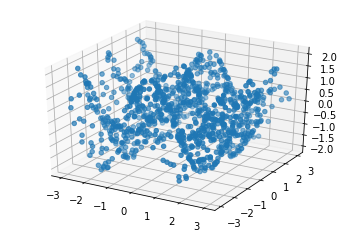

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
def full_gd(model, criterion, optimizer, X_train, Y_train, epochs=1000):
  train_losses = np.zeros(epochs)
  for it in range(epochs):
    optimizer.zero_grad()
    outputs=model(X_train)
    loss=criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()
    train_losses[it] = loss.item()
    print(f"Epoch: {it+1}/{epochs}, Train Loss: {loss.item():.4f}")
  return train_losses
X_train = torch.from_numpy(X.astype(np.float32))
Y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, X_train, Y_train)

Epoch: 1/1000, Train Loss: 0.9827
Epoch: 2/1000, Train Loss: 1.0689
Epoch: 3/1000, Train Loss: 0.9961
Epoch: 4/1000, Train Loss: 0.9485
Epoch: 5/1000, Train Loss: 0.9801
Epoch: 6/1000, Train Loss: 0.9924
Epoch: 7/1000, Train Loss: 0.9563
Epoch: 8/1000, Train Loss: 0.9243
Epoch: 9/1000, Train Loss: 0.9242
Epoch: 10/1000, Train Loss: 0.9370
Epoch: 11/1000, Train Loss: 0.9353
Epoch: 12/1000, Train Loss: 0.9169
Epoch: 13/1000, Train Loss: 0.8969
Epoch: 14/1000, Train Loss: 0.8892
Epoch: 15/1000, Train Loss: 0.8929
Epoch: 16/1000, Train Loss: 0.8953
Epoch: 17/1000, Train Loss: 0.8867
Epoch: 18/1000, Train Loss: 0.8711
Epoch: 19/1000, Train Loss: 0.8590
Epoch: 20/1000, Train Loss: 0.8550
Epoch: 21/1000, Train Loss: 0.8539
Epoch: 22/1000, Train Loss: 0.8485
Epoch: 23/1000, Train Loss: 0.8378
Epoch: 24/1000, Train Loss: 0.8263
Epoch: 25/1000, Train Loss: 0.8188
Epoch: 26/1000, Train Loss: 0.8150
Epoch: 27/1000, Train Loss: 0.8102
Epoch: 28/1000, Train Loss: 0.8012
Epoch: 29/1000, Train Loss: 0

In [ ]:
X_train, Y_train

(tensor([[ 1.0566,  2.0303],
         [-0.8291, -0.0931],
         [-2.6149, -1.0462],
         ...,
         [-0.5582,  2.9905],
         [-2.8792, -0.1761],
         [-1.3809, -1.8112]]), tensor([[ 4.6544e-01],
         [ 8.7397e-01],
         [-5.0545e-01],
         [-9.1539e-01],
         [ 1.8096e-01],
         [ 2.8534e-01],
         [ 2.4858e-01],
         [-9.2994e-01],
         [ 8.9643e-01],
         [ 4.5669e-03],
         [ 7.3759e-01],
         [ 1.1550e+00],
         [-1.0009e+00],
         [ 9.8638e-01],
         [ 1.5614e-01],
         [ 3.6335e-01],
         [ 1.2109e-01],
         [-4.9034e-01],
         [-6.3092e-01],
         [ 6.9507e-02],
         [-6.0748e-01],
         [-1.1419e+00],
         [ 1.9129e+00],
         [-7.9889e-02],
         [ 5.9380e-01],
         [-1.2825e+00],
         [-9.7683e-01],
         [-1.7123e+00],
         [ 1.2526e-01],
         [ 8.1244e-01],
         [-1.0485e+00],
         [-7.7595e-01],
         [-1.0013e+00],
         [ 5.8718e-

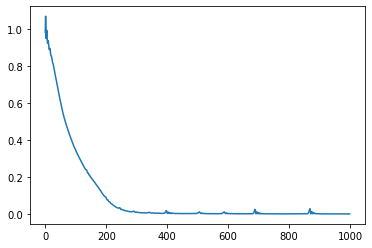

In [ ]:
plt.plot(train_losses)

In [ ]:
np.linspace(-3, 3, 50)

array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])

In [ ]:
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
xx, xx.shape

(array([[-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ],
        [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ],
        [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ],
        ...,
        [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ],
        [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ],
        [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ]]), (50, 50))

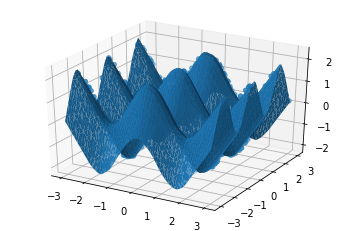

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line) #line has shape (50, ) and meshgrid stacks line on line so its shape becomes (50, 50)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T #xx has shape(50, 50) and yy has shape(50, 50) so when you stack it vertically it has 2500 elements each(xx and yy) so final shape becomes (2500, 2)
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()

In [ ]:
xx.flatten(), xx.flatten().shape

(array([-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
         2.87755102,  3.        ]), (2500,))

In [ ]:
Xgrid, Xgrid.shape

(array([[-3.        , -3.        ],
        [-2.87755102, -3.        ],
        [-2.75510204, -3.        ],
        ...,
        [ 2.75510204,  3.        ],
        [ 2.87755102,  3.        ],
        [ 3.        ,  3.        ]]), (2500, 2))